In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import os


In [21]:
df = pd.read_csv("../data/processed/cleaned_data.csv")
print("Shape:", df.shape)
df.head()


Shape: (64236, 4)


,text,label,source,clean_text
0,"WHO praises India's Aarogya Setu app, says it ...",1.0,IFND,praise india aarogya setu app say helped ident...
1,"In Delhi, Deputy US Secretary of State Stephen...",1.0,IFND,delhi deputy u secretary state stephen biegun ...
2,LAC tensions: China's strategy behind delibera...,1.0,IFND,lac tension china strategy behind deliberately...
3,India has signed 250 documents on Space cooper...,1.0,IFND,india signed document space cooperation countr...
4,Tamil Nadu chief minister's mother passes away...,1.0,IFND,tamil nadu chief minister mother pass away


In [22]:
df["clean_text"] = df["clean_text"].fillna("").astype(str)


In [23]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64236 entries, 0 to 64235
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        64235 non-null  object 
 1   label       64236 non-null  float64
 2   source      64236 non-null  object 
 3   clean_text  64236 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


,text,label,source,clean_text
count,64235,64236.000000,64236,64236
unique,64235,NaN,3,64235
top,"WHO praises India's Aarogya Setu app, says it ...",NaN,IFND,
freq,1,NaN,37708,2
mean,NaN,0.822981,NaN,NaN
std,NaN,0.381688,NaN,NaN
min,NaN,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN


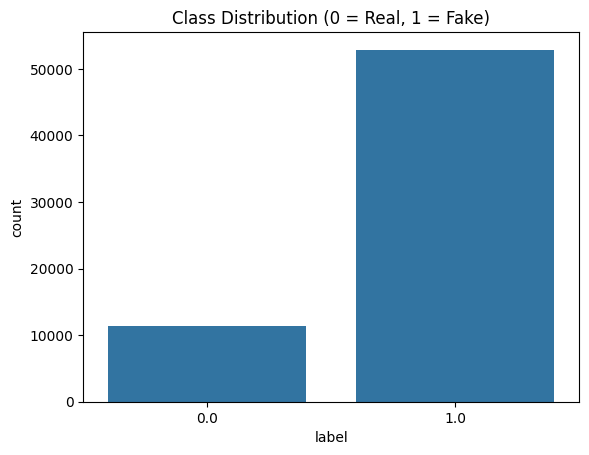

In [24]:
sns.countplot(x="label", data=df)
plt.title("Class Distribution (0 = Real, 1 = Fake)")
plt.show()


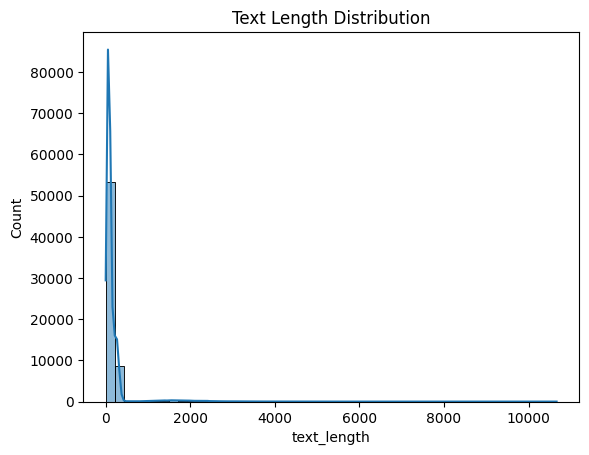

In [25]:
df["text_length"] = df["clean_text"].apply(len)

sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.show()


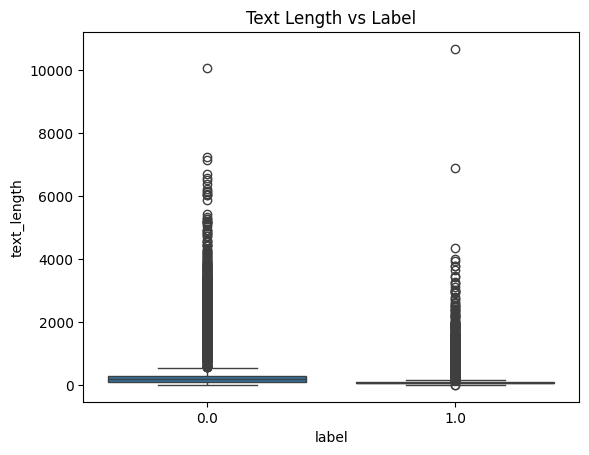

In [26]:
sns.boxplot(x="label", y="text_length", data=df)
plt.title("Text Length vs Label")
plt.show()


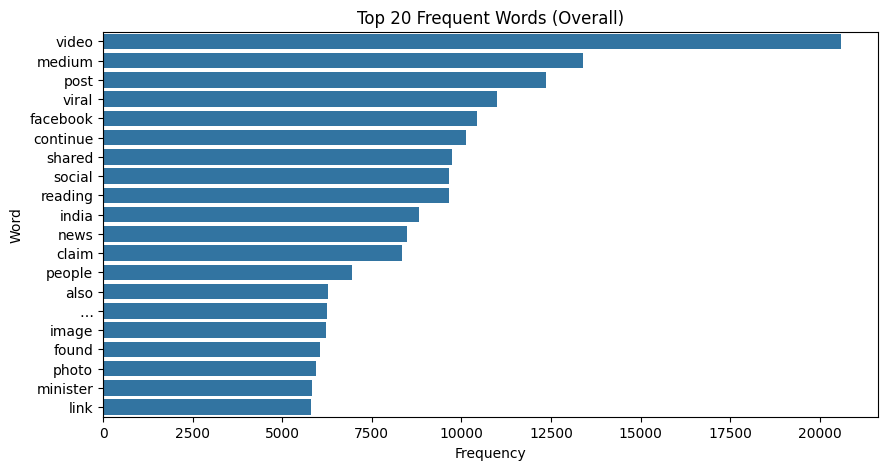

In [27]:
all_words = " ".join(df["clean_text"]).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

freq_df = pd.DataFrame(common_words, columns=["Word", "Frequency"])

plt.figure(figsize=(10,5))
sns.barplot(x="Frequency", y="Word", data=freq_df)
plt.title("Top 20 Frequent Words (Overall)")
plt.show()


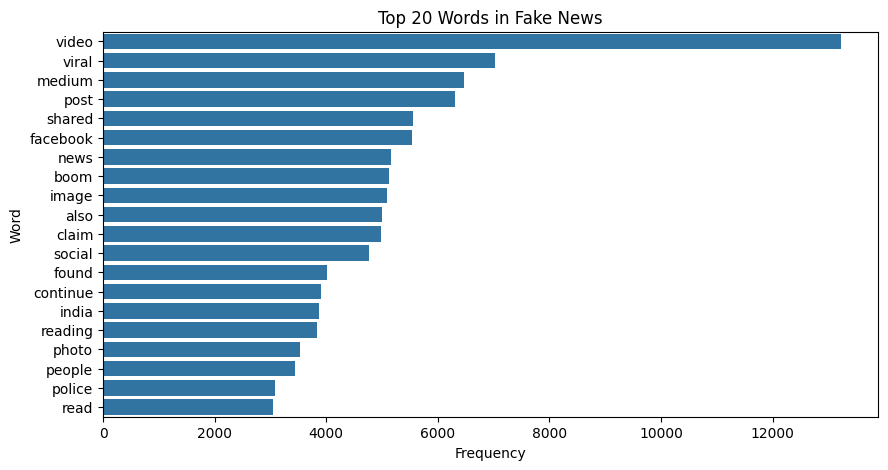

In [28]:
fake_texts = df[df["label"] == 0]["clean_text"]
fake_words = " ".join(fake_texts).split()
fake_freq = Counter(fake_words).most_common(20)

fake_df = pd.DataFrame(fake_freq, columns=["Word", "Frequency"])

plt.figure(figsize=(10,5))
sns.barplot(x="Frequency", y="Word", data=fake_df)
plt.title("Top 20 Words in Fake News")
plt.show()


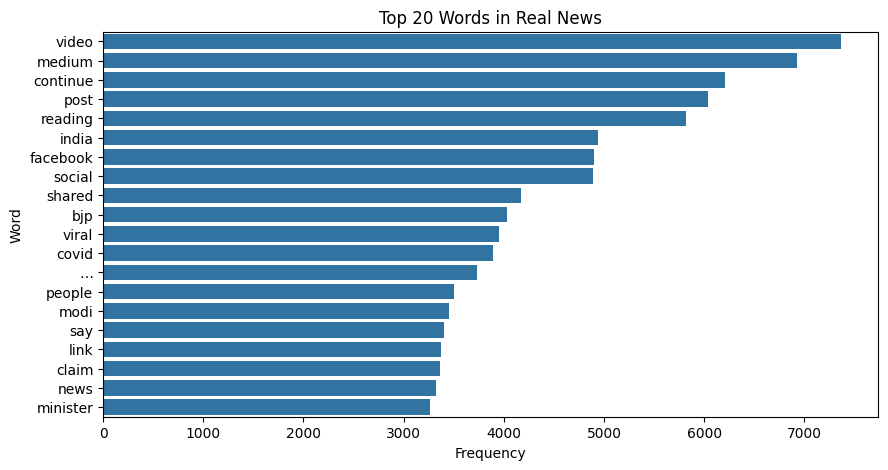

In [29]:
real_texts = df[df["label"] == 1]["clean_text"]
real_words = " ".join(real_texts).split()
real_freq = Counter(real_words).most_common(20)

real_df = pd.DataFrame(real_freq, columns=["Word", "Frequency"])

plt.figure(figsize=(10,5))
sns.barplot(x="Frequency", y="Word", data=real_df)
plt.title("Top 20 Words in Real News")
plt.show()


In [30]:
vectorizer = CountVectorizer(ngram_range=(2,2), max_features=20)

text_data = df["clean_text"]
text_data = text_data[text_data.str.strip() != ""]  # remove empty

X = vectorizer.fit_transform(text_data)

bigrams = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1

bigram_freq = pd.DataFrame({
    "Bigram": bigrams,
    "Frequency": counts
}).sort_values(by="Frequency", ascending=False)

bigram_freq


,Bigram,Frequency
3,continue reading,8640
17,social medium,8375
5,detail information,2707
18,society medium,2633
8,going viral,2406
14,prime minister,2305
19,viral social,2196
0,archive link,2052
13,post shared,1925
9,information facebook,1872


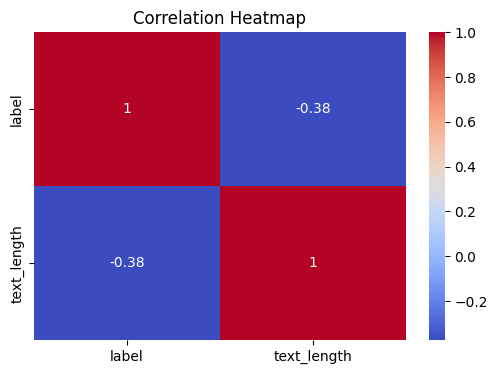

In [31]:
numeric_cols = df.select_dtypes(include=np.number)

plt.figure(figsize=(6,4))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


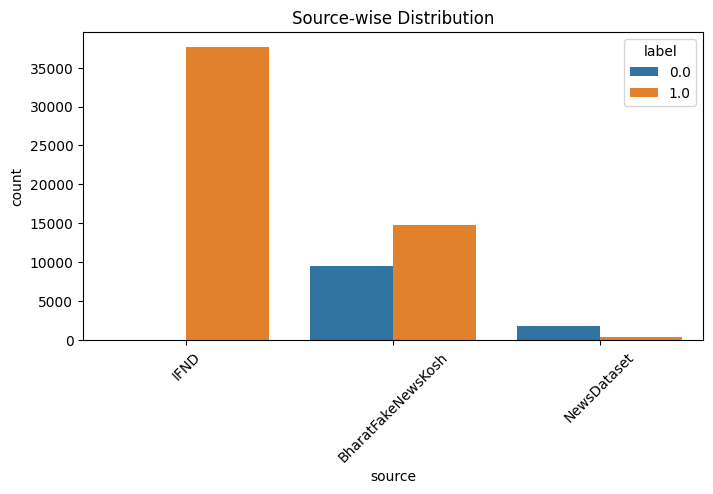

In [32]:
if "source" in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x="source", hue="label", data=df)
    plt.xticks(rotation=45)
    plt.title("Source-wise Distribution")
    plt.show()


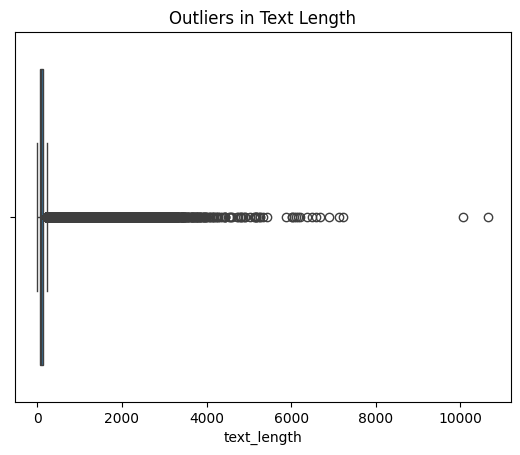

In [33]:
sns.boxplot(x=df["text_length"])
plt.title("Outliers in Text Length")
plt.show()


In [34]:
os.makedirs("../artifacts/visuals", exist_ok=True)
print("EDA visuals folder ready.")


EDA visuals folder ready.


In [35]:
print("EDA Completed Successfully – No Errors")


EDA Completed Successfully – No Errors
